In [2]:
from matplotlib import pyplot as plt
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
from sklearn.metrics import classification_report
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical

print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

print('Reading test dataset (Test 20000.cdb)...')
X_test, Y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)



Using TensorFlow backend.


Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...


In [6]:
x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(y_train[2])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# B

Epoch 1/2
60000/60000 [==============================] - 24s 400us/step - loss: 0.4830 - acc: 0.8988
Epoch 2/2
20000/20000 [==============================] - 2s 96us/step
Test score: 0.29835630317032336
Test accuracy: 0.91115
20000/20000 [==============================] - 2s 89us/step
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2000
         1.0       0.93      0.96      0.94      2000
         2.0       0.77      0.89      0.82      2000
         3.0       0.89      0.82      0.85      2000
         4.0       0.87      0.87      0.87      2000
         5.0       0.97      0.95      0.96      2000
         6.0       0.91      0.87      0.89      2000
         7.0       0.98      0.93      0.95      2000
         8.0       0.96      0.94      0.95      2000
         9.0       0.91      0.91      0.91      2000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted a

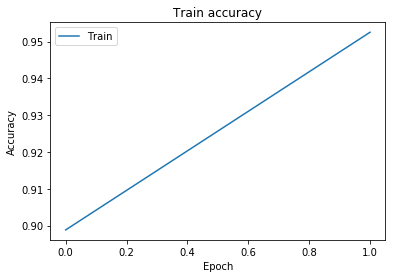

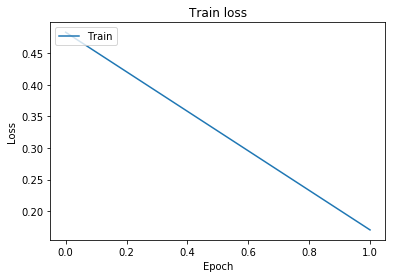

In [8]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(32 * 32,)))
network.add(Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(x_train, y_train, epochs=2)
score = network.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(history)

y_pred = network.predict(x_test,verbose = 1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

plt.plot(history.history['acc'])
plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('Train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
    

# C - Adding Dropout 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/2
60000/60000 [==============================] - 22s 363us/step - loss: 0.6177 - acc: 0.8677
Epoch 2/2
20000/20000 [==============================] - 2s 92us/step
Test score: 0.3347589182332158
Test accuracy: 0.89675
20000/20000 [==============================] - 2s 76us/step
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2000
         1.0       0.93      0.96      0.94      2000
         2.0       0.77      0.89      0.82      2000
         3.0       0.89      0.82      0.85      2000
         4.0       0.87      0.87      0.87      2000
         5.0       0.97      0.95      0.96      2000
         6.0       0.91      0.87      0.89      2000
         7.0       0.98      0.93      0.95      2000
         8.0       0.96      0.94      0.95      2000
         9.0       0.91      0.91      0.91      2000

    

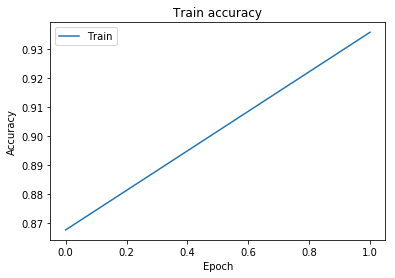

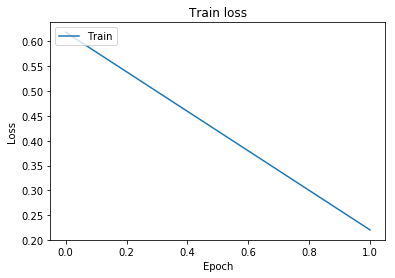

In [9]:
network_c = Sequential()
network_c.add(Dropout(0.2, input_shape=(32*32,)))
network_c.add(Dense(512, activation='relu'))
network_c.add(Dropout(0.5))
network_c.add(Dense(10, activation='softmax'))
network_c.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_c = network_c.fit(x_train, y_train, epochs=2)
score_c = network_c.evaluate(x_test, y_test)
print('Test score:', score_c[0])
print('Test accuracy:', score_c[1])

y_pred = network.predict(x_test,verbose = 1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

plt.plot(history_c.history['acc'])
plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history_c.history['loss'])
plt.title('Train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### As we can see, using dropout increases the accuracy on training and testing.

# D - Validation Set

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 18s 378us/step - loss: 0.5568 - acc: 0.8826 - val_loss: 0.2136 - val_acc: 0.9399
Epoch 2/2
20000/20000 [==============================] - 2s 85us/step
Test score: 0.3069405316725373
Test accuracy: 0.9057
20000/20000 [==============================] - 2s 80us/step
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2000
         1.0       0.93      0.96      0.94      2000
         2.0       0.77      0.89      0.82      2000
         3.0       0.89      0.82      0.85      2000
         4.0       0.87      0.87      0.87      2000
         5.0       0.97      0.95      0.96      2000
         6.0       0.91      0.87      0.89      2000
         7.0       0.98      0.93      0.95      2000
         8.0       0.96      0.94      0.95      2000
         9.0       0.91      0.91      0.91      2000

    accuracy                     

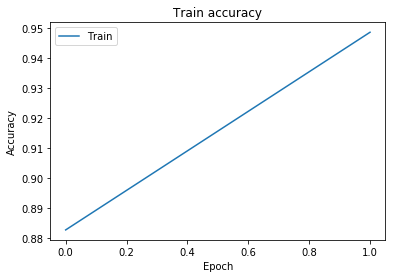

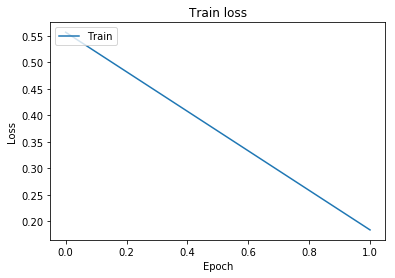

In [10]:
network_d = Sequential()
network_d.add(Dense(512, activation='relu'))
network_d.add(Dense(10, activation='softmax'))

network_d.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_d = network_d.fit(x_train, y_train, epochs=2, validation_split = 0.2)
score_d = network_d.evaluate(x_test, y_test)

print('Test score:', score_d[0])
print('Test accuracy:', score_d[1])

y_pred = network.predict(x_test,verbose = 1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

plt.plot(history_d.history['acc'])
plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history_d.history['loss'])
plt.title('Train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### As we can see, using validation set increases the accuracy on training and testing and decreases loss.